# Day 5: Data Manipulation and Analysis
## Notebook 2: Data Cleaning and Transformation

**Introduction to Scientific Programming**  
CNC-UC | 2025

This notebook covers:
- Handling missing data
- Detecting and handling outliers
- Data type conversions
- String and categorical operations
- Creating new columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

print("Setup complete!")

Setup complete!


## 1. Handling Missing Data

### Creating dataset with missing values

In [2]:
# Create example dataset with missing values
np.random.seed(42)
n = 50

data_with_na = pd.DataFrame({
    'subject_id': [f'S{i:02d}' for i in range(1, n+1)],
    'age': np.random.randint(20, 40, n),
    'reaction_time': np.random.gamma(2, 200, n),
    'accuracy': np.random.random(n),
    'condition': np.random.choice(['control', 'drug_A', 'drug_B'], n)
})

# Introduce missing values
data_with_na.loc[np.random.choice(data_with_na.index, 5), 'reaction_time'] = np.nan
data_with_na.loc[np.random.choice(data_with_na.index, 3), 'age'] = np.nan
data_with_na.loc[np.random.choice(data_with_na.index, 7), 'accuracy'] = np.nan

print("Dataset with missing values:")
data_with_na.head(10)

Dataset with missing values:


,subject_id,age,reaction_time,accuracy,condition
0,S01,26.0,101.764614,0.632306,drug_A
1,S02,39.0,702.252372,0.633530,drug_B
2,S03,NaN,393.032319,NaN,control
3,S04,30.0,616.770196,0.090290,control
4,S05,27.0,134.776600,0.835302,control
5,S06,26.0,68.876556,0.320780,control
6,S07,38.0,92.512268,0.186519,drug_A
7,S08,30.0,153.743706,0.040775,control
8,S09,30.0,507.359764,0.590893,drug_B
9,S10,23.0,619.103139,0.677564,drug_B


### Detecting missing values

In [3]:
# Count missing values per column
print("Missing values per column:")
print(data_with_na.isnull().sum())
print()

# Percentage missing
print("Percentage missing per column:")
print((data_with_na.isnull().sum() / len(data_with_na) * 100).round(2))
print()

# Rows with any missing values
rows_with_na = data_with_na[data_with_na.isnull().any(axis=1)]
print(f"Rows with any missing values: {len(rows_with_na)}")
print(rows_with_na.head())

Missing values per column:
subject_id       0
age              3
reaction_time    5
accuracy         7
condition        0
dtype: int64

Percentage missing per column:
subject_id        0.0
age               6.0
reaction_time    10.0
accuracy         14.0
condition         0.0
dtype: float64

Rows with any missing values: 12
   subject_id   age  reaction_time  accuracy condition
2         S03   NaN     393.032319       NaN   control
17        S18  31.0     314.141472       NaN    drug_A
20        S21  29.0            NaN  0.113474    drug_A
22        S23   NaN      84.818223  0.877339    drug_B
24        S25  38.0     213.511909       NaN    drug_B


### Deletion strategies

In [4]:
# Drop rows with ANY missing value
df_dropna_any = data_with_na.dropna()
print(f"Original rows: {len(data_with_na)}")
print(f"After dropna(): {len(df_dropna_any)}")
print(f"Rows lost: {len(data_with_na) - len(df_dropna_any)}")
print()

# Drop rows with ALL missing values
df_dropna_all = data_with_na.dropna(how='all')
print(f"After dropna(how='all'): {len(df_dropna_all)}")
print()

# Drop rows with missing in specific columns
df_dropna_subset = data_with_na.dropna(subset=['reaction_time', 'accuracy'])
print(f"After dropna(subset=['reaction_time', 'accuracy']): {len(df_dropna_subset)}")
print()

# Threshold: require minimum non-NA values
df_dropna_thresh = data_with_na.dropna(thresh=4)  # At least 4 non-NA
print(f"After dropna(thresh=4): {len(df_dropna_thresh)}")

Original rows: 50
After dropna(): 38
Rows lost: 12

After dropna(how='all'): 50

After dropna(subset=['reaction_time', 'accuracy']): 39

After dropna(thresh=4): 47


### Imputation strategies

In [6]:
# Create a clean copy for imputation examples
df_imputed = data_with_na.copy()

# Fill with specific value
df_imputed['accuracy_filled_zero'] = df_imputed['accuracy'].fillna(0)

# Fill with mean
df_imputed['rt_filled_mean'] = df_imputed['reaction_time'].fillna(
    df_imputed['reaction_time'].mean()
)

# Fill with median
df_imputed['rt_filled_median'] = df_imputed['reaction_time'].fillna(
    df_imputed['reaction_time'].median()
)

# Forward fill (propagate previous value)
df_imputed['rt_ffill'] = df_imputed['reaction_time'].fillna(method='ffill')

# Backward fill
df_imputed['rt_bfill'] = df_imputed['reaction_time'].fillna(method='bfill')

print("Imputation comparison:")
df_imputed[['reaction_time', 'rt_filled_mean', 'rt_filled_median', 
                  'rt_ffill', 'rt_bfill']].head(15)

Imputation comparison:


/tmp/ipykernel_38934/2683822426.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed['rt_ffill'] = df_imputed['reaction_time'].fillna(method='ffill')
/tmp/ipykernel_38934/2683822426.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed['rt_bfill'] = df_imputed['reaction_time'].fillna(method='bfill')


,reaction_time,rt_filled_mean,rt_filled_median,rt_ffill,rt_bfill
0,101.764614,101.764614,101.764614,101.764614,101.764614
1,702.252372,702.252372,702.252372,702.252372,702.252372
2,393.032319,393.032319,393.032319,393.032319,393.032319
3,616.770196,616.770196,616.770196,616.770196,616.770196
4,134.776600,134.776600,134.776600,134.776600,134.776600
5,68.876556,68.876556,68.876556,68.876556,68.876556
6,92.512268,92.512268,92.512268,92.512268,92.512268
7,153.743706,153.743706,153.743706,153.743706,153.743706
8,507.359764,507.359764,507.359764,507.359764,507.359764
9,619.103139,619.103139,619.103139,619.103139,619.103139


### Interpolation for timeseries

/tmp/ipykernel_38934/2421863790.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range('2024-01-01', periods=20, freq='1H')


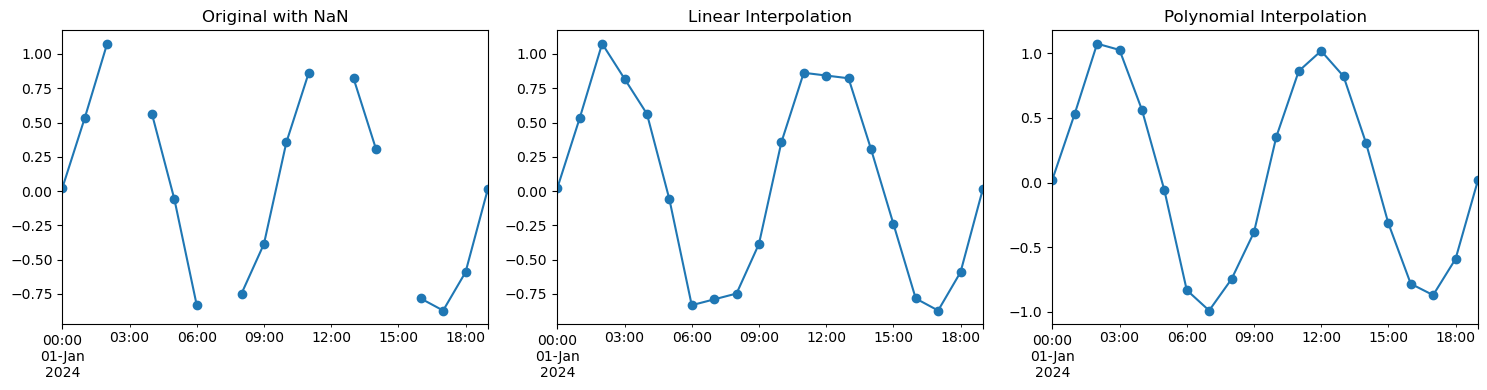

In [7]:
# Create timeseries with gaps
time_index = pd.date_range('2024-01-01', periods=20, freq='1H')
signal = np.sin(np.linspace(0, 4*np.pi, 20)) + np.random.normal(0, 0.1, 20)

# Introduce gaps
signal[[3, 7, 12, 15]] = np.nan

ts_data = pd.DataFrame({
    'signal': signal
}, index=time_index)

# Different interpolation methods
ts_data['linear'] = ts_data['signal'].interpolate(method='linear')
ts_data['polynomial'] = ts_data['signal'].interpolate(method='polynomial', order=2)

# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

ts_data['signal'].plot(ax=axes[0], marker='o', title='Original with NaN')
ts_data['linear'].plot(ax=axes[1], marker='o', title='Linear Interpolation')
ts_data['polynomial'].plot(ax=axes[2], marker='o', title='Polynomial Interpolation')

plt.tight_layout()
plt.show()

## 2. Detecting and Handling Outliers

In [8]:
# Create dataset with outliers
np.random.seed(42)
normal_data = np.random.normal(500, 50, 95)
outliers = np.array([150, 200, 900, 950, 1000])  # Clear outliers
data_with_outliers = np.concatenate([normal_data, outliers])

df_outliers = pd.DataFrame({
    'reaction_time': data_with_outliers,
    'subject': [f'S{i:02d}' for i in range(1, 101)]
})

print("Data with outliers:")
df_outliers.describe()

Data with outliers:


,reaction_time
count,100.000000
mean,502.375581
std,101.771199
min,150.000000
25%,469.372005
50%,493.652185
75%,527.991955
max,1000.000000


### Z-score method

In [9]:
# Calculate z-scores
df_outliers['z_score'] = np.abs(stats.zscore(df_outliers['reaction_time']))

# Flag outliers (|z| > 3)
df_outliers['is_outlier_z'] = df_outliers['z_score'] > 3

print("Outliers detected with z-score:")
print(df_outliers[df_outliers['is_outlier_z']])
print(f"\nNumber of outliers: {df_outliers['is_outlier_z'].sum()}")

Outliers detected with z-score:
    reaction_time subject   z_score  is_outlier_z
95          150.0     S96  3.479872          True
97          900.0     S98  3.926726          True
98          950.0     S99  4.420499          True
99         1000.0    S100  4.914272          True

Number of outliers: 4


### IQR method

In [10]:
# Calculate IQR
Q1 = df_outliers['reaction_time'].quantile(0.25)
Q3 = df_outliers['reaction_time'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers
df_outliers['is_outlier_iqr'] = (
    (df_outliers['reaction_time'] < lower_bound) | 
    (df_outliers['reaction_time'] > upper_bound)
)

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"\nNumber of outliers (IQR): {df_outliers['is_outlier_iqr'].sum()}")

Q1: 469.37
Q3: 527.99
IQR: 58.62
Lower bound: 381.44
Upper bound: 615.92

Number of outliers (IQR): 6


### Visual detection

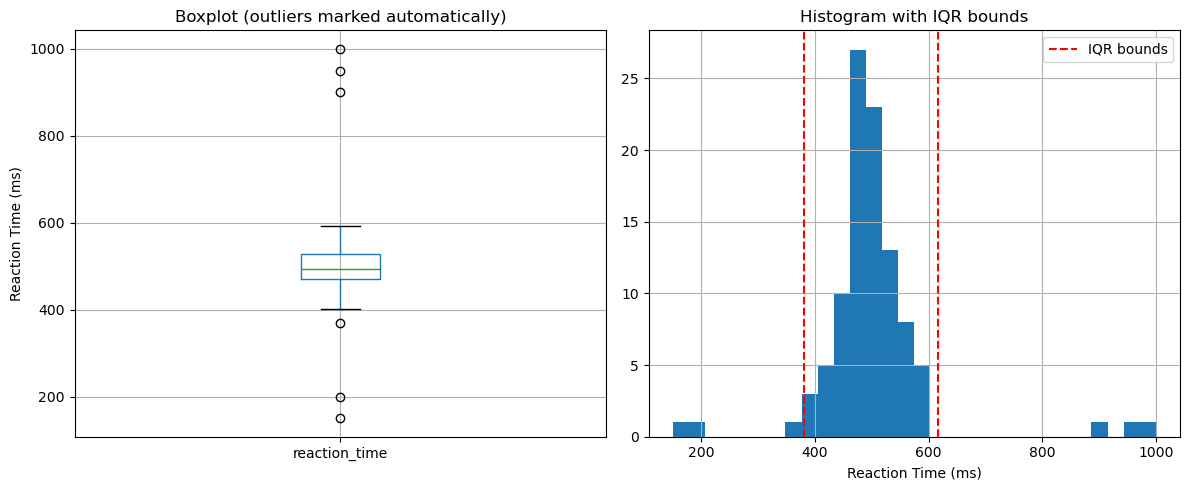

In [11]:
# Boxplot shows outliers automatically
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df_outliers.boxplot(column='reaction_time', ax=axes[0])
axes[0].set_title('Boxplot (outliers marked automatically)')
axes[0].set_ylabel('Reaction Time (ms)')

df_outliers['reaction_time'].hist(bins=30, ax=axes[1])
axes[1].axvline(lower_bound, color='r', linestyle='--', label='IQR bounds')
axes[1].axvline(upper_bound, color='r', linestyle='--')
axes[1].set_title('Histogram with IQR bounds')
axes[1].set_xlabel('Reaction Time (ms)')
axes[1].legend()

plt.tight_layout()
plt.show()

## 3. Data Type Conversions

In [12]:
# Create example data
df_types = pd.DataFrame({
    'subject_id': ['1', '2', '3', '4', '5'],
    'trial': ['10', '20', '30', '40', '50'],
    'correct': ['1', '0', '1', '1', '0'],
    'dose': ['low', 'medium', 'high', 'low', 'medium']
})

print("Original dtypes:")
df_types.dtypes

Original dtypes:


subject_id    object
trial         object
correct       object
dose          object
dtype: object

### Basic conversions

In [13]:
# Convert to numeric
df_types['subject_id'] = df_types['subject_id'].astype(int)
df_types['trial'] = df_types['trial'].astype(int)
df_types['correct'] = df_types['correct'].astype(bool)

print("After conversion:")
print(df_types.dtypes)
df_types

After conversion:
subject_id     int64
trial          int64
correct         bool
dose          object
dtype: object


,subject_id,trial,correct,dose
0,1,10,True,low
1,2,20,True,medium
2,3,30,True,high
3,4,40,True,low
4,5,50,True,medium


### Safe conversions

In [14]:
# Data with some non-numeric values
messy_data = pd.Series(['100', '200', 'NA', '300', 'error', '400'])

# This would fail: messy_data.astype(int)

# Safe conversion with errors='coerce'
clean_data = pd.to_numeric(messy_data, errors='coerce')
print("Safe conversion (invalid → NaN):")
print(clean_data)
print()

# Or ignore errors
ignored_data = pd.to_numeric(messy_data, errors='ignore')
print("Ignore errors (keeps original):")
print(ignored_data)

Safe conversion (invalid → NaN):
0    100.0
1    200.0
2      NaN
3    300.0
4      NaN
5    400.0
dtype: float64

Ignore errors (keeps original):
0      100
1      200
2       NA
3      300
4    error
5      400
dtype: object


/tmp/ipykernel_38934/2158510463.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  ignored_data = pd.to_numeric(messy_data, errors='ignore')


### Categorical data for memory efficiency

In [15]:
# Create large dataset with repeated values
large_df = pd.DataFrame({
    'condition': np.random.choice(['control', 'drug_A', 'drug_B'], 10000)
})

# Memory usage before
memory_before = large_df['condition'].memory_usage(deep=True)
print(f"Memory usage (object): {memory_before / 1024:.2f} KB")

# Convert to category
large_df['condition'] = large_df['condition'].astype('category')
memory_after = large_df['condition'].memory_usage(deep=True)
print(f"Memory usage (category): {memory_after / 1024:.2f} KB")
print(f"Reduction: {(1 - memory_after/memory_before)*100:.1f}%")

Memory usage (object): 540.52 KB
Memory usage (category): 10.16 KB
Reduction: 98.1%


## 4. Working with Categorical and String Data

### String operations (.str accessor)

In [16]:
# Create example string data
df_str = pd.DataFrame({
    'gene_id': ['  BDNF_human  ', 'TrkB_MOUSE', 'creb_rat', 'ARC_Human'],
    'description': ['brain-derived neurotrophic factor', 
                    'tropomyosin receptor kinase B',
                    'cAMP response element-binding protein',
                    'activity regulated cytoskeleton']
})

print("Original data:")
df_str

Original data:


,gene_id,description
0,BDNF_human,brain-derived neurotrophic factor
1,TrkB_MOUSE,tropomyosin receptor kinase B
2,creb_rat,cAMP response element-binding protein
3,ARC_Human,activity regulated cytoskeleton


In [17]:
# String manipulation
df_str['gene_clean'] = df_str['gene_id'].str.strip()  # Remove whitespace
df_str['gene_upper'] = df_str['gene_id'].str.upper()  # Uppercase
df_str['gene_lower'] = df_str['gene_id'].str.lower()  # Lowercase
df_str['gene_replaced'] = df_str['gene_id'].str.replace('_', '-')  # Replace

print("After string operations:")
df_str[['gene_id', 'gene_clean', 'gene_upper', 'gene_lower']]

After string operations:


,gene_id,gene_clean,gene_upper,gene_lower
0,BDNF_human,BDNF_human,BDNF_HUMAN,bdnf_human
1,TrkB_MOUSE,TrkB_MOUSE,TRKB_MOUSE,trkb_mouse
2,creb_rat,creb_rat,CREB_RAT,creb_rat
3,ARC_Human,ARC_Human,ARC_HUMAN,arc_human


In [18]:
# Extraction and splitting
df_str['gene_name'] = df_str['gene_clean'].str.split('_').str[0]
df_str['species'] = df_str['gene_clean'].str.split('_').str[1]
df_str['desc_length'] = df_str['description'].str.len()
df_str['contains_kinase'] = df_str['description'].str.contains('kinase')

print("\nExtraction results:")
df_str[['gene_name', 'species', 'desc_length', 'contains_kinase']]


Extraction results:


,gene_name,species,desc_length,contains_kinase
0,BDNF,human,33,False
1,TrkB,MOUSE,29,True
2,creb,rat,37,False
3,ARC,Human,31,False


### Categorical operations

In [19]:
# Create ordered categorical
df_cat = pd.DataFrame({
    'dose': ['low', 'high', 'medium', 'low', 'high', 'medium']
})

# Convert to ordered category
df_cat['dose'] = pd.Categorical(
    df_cat['dose'],
    categories=['low', 'medium', 'high'],
    ordered=True
)

print("Ordered categorical:")
print(df_cat['dose'])
print()

# Now we can sort properly
print("Sorted by dose:")
print(df_cat.sort_values('dose'))

Ordered categorical:
0       low
1      high
2    medium
3       low
4      high
5    medium
Name: dose, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

Sorted by dose:
     dose
0     low
3     low
2  medium
5  medium
1    high
4    high


## 5. Creating New Columns - Transformations

In [20]:
# Create example dataset
np.random.seed(42)
df_transform = pd.DataFrame({
    'expression': np.random.exponential(100, 20),
    'control': np.random.exponential(100, 20),
    'treated': np.random.exponential(120, 20),
    'threshold': np.random.uniform(50, 150, 20)
})

print("Original data:")
df_transform.head()

Original data:


,expression,control,treated,threshold
0,46.926809,94.637087,15.618268,88.867729
1,301.012143,15.023453,82.025667,77.134903
2,131.674569,34.551551,4.199247,132.873751
3,91.294255,45.627722,288.050746,85.675333
4,16.962487,60.893469,35.934933,78.093451


### Simple arithmetic operations

In [21]:
# Log transformation
df_transform['log_expression'] = np.log2(df_transform['expression'] + 1)

# Combining columns
df_transform['fold_change'] = df_transform['treated'] / df_transform['control']

# Normalization
mean_expr = df_transform['expression'].mean()
std_expr = df_transform['expression'].std()
df_transform['z_score'] = (df_transform['expression'] - mean_expr) / std_expr

print("After transformations:")
df_transform[['expression', 'log_expression', 'fold_change', 'z_score']].head()

After transformations:


,expression,log_expression,fold_change,z_score
0,46.926809,5.582761,0.165033,-0.449707
1,301.012143,8.238463,5.459841,2.131497
2,131.674569,7.051748,0.121536,0.411229
3,91.294255,6.528169,6.313064,0.001013
4,16.962487,4.166915,0.590128,-0.754109


### Conditional values

In [22]:
# Simple condition with np.where
df_transform['category'] = np.where(
    df_transform['expression'] > 100, 
    'high', 
    'low'
)

# Multiple conditions with np.select
conditions = [
    df_transform['expression'] < 50,
    (df_transform['expression'] >= 50) & (df_transform['expression'] < 100),
    df_transform['expression'] >= 100
]
values = ['low', 'medium', 'high']
df_transform['category_3level'] = np.select(conditions, values)

print("\nConditional categorization:")
df_transform[['expression', 'category', 'category_3level']].head(10)


Conditional categorization:


,expression,category,category_3level
0,46.926809,low,low
1,301.012143,high,high
2,131.674569,high,high
3,91.294255,low,medium
4,16.962487,low,low
5,16.959629,low,low
6,5.983877,low,low
7,201.123086,high,high
8,91.908215,low,medium
9,123.125006,high,high


### Custom functions with .apply()

In [23]:
# Custom function
def classify_expression(value):
    if value < 50:
        return 'very_low'
    elif value < 100:
        return 'low'
    elif value < 150:
        return 'medium'
    else:
        return 'high'

df_transform['custom_category'] = df_transform['expression'].apply(classify_expression)

# Lambda function
df_transform['doubled'] = df_transform['expression'].apply(lambda x: x * 2)

# Mapping dictionary
category_map = {'low': 1, 'medium': 2, 'high': 3}
df_transform['category_numeric'] = df_transform['category_3level'].map(category_map)

print("\nCustom functions and mapping:")
df_transform[['expression', 'custom_category', 'doubled', 'category_numeric']].head()


Custom functions and mapping:


,expression,custom_category,doubled,category_numeric
0,46.926809,very_low,93.853618,1
1,301.012143,high,602.024286,3
2,131.674569,medium,263.349139,3
3,91.294255,low,182.588511,2
4,16.962487,very_low,33.924974,1


## Summary

In this notebook we covered:
- Detecting and handling missing data (deletion, imputation, interpolation)
- Outlier detection (z-score, IQR methods)
- Data type conversions (safe conversions, categorical types)
- String operations and categorical data
- Creating new columns (arithmetic, conditional, apply)

**Next notebook:** Grouping, Aggregation, and Reshaping

In [24]:
print("Notebook 2 complete!")

Notebook 2 complete!
